# H2O



In [5]:
#import turbodbc
import numpy as np
import pandas as pd
import datetime
import sys
sys.path.insert(0, "/opt/h2o/h2o-3.14.0.2-python-bin-with-deps.zip")

import h2o
import configparser

In [8]:
config = configparser.ConfigParser()
config.read('settings.ini')
login = config['MAIN']['login']
password = config['MAIN']['password']

## Launching

In [115]:
with open('info.txt') as f:
    first_line = f.readline().strip()
ip = first_line.split(':')[0]
host = first_line.split(':')[1]

h2o.connect(ip=ip, port=host, auth = (login, password))

Connecting to H2O server at http://10.12.49.29:54321... successful.


H2O cluster uptime:,55 secs
H2O cluster version:,3.14.0.2
H2O cluster version age:,11 months and 22 days !!!
H2O cluster name:,H2O_91218
H2O cluster total nodes:,20
H2O cluster free memory:,191.7 Gb
H2O cluster total cores:,560
H2O cluster allowed cores:,560
H2O cluster status:,"locked, healthy"
H2O connection url:,http://10.12.49.29:54321
H2O connection proxy:,None


<H2OConnection to http://10.12.49.29:54321, session _sid_a7e8>

In [17]:
h2o.cluster().show_status()

H2O cluster uptime:,46 secs
H2O cluster version:,3.14.0.2
H2O cluster version age:,11 months and 22 days !!!
H2O cluster name:,H2O_47018
H2O cluster total nodes:,20
H2O cluster free memory:,191.7 Gb
H2O cluster total cores:,560
H2O cluster allowed cores:,560
H2O cluster status:,"locked, healthy"
H2O connection url:,http://10.12.49.63:54327
H2O connection proxy:,None


## Loading data into H2O

In [18]:
sql = """
      select top 100 *
        from UAT_DM.AR_income_subs_prices_proto  
      """

In [19]:
%%time
connection = turbodbc.connect(dsn='Teradata')
cursor = connection.cursor()
cursor.execute(sql)
data = pd.DataFrame(cursor.fetchallnumpy())

Wall time: 1min 55s


In [20]:
data.head()

,log_income,bin_income,report_month,SUBS_ID,current_imei,model_user_count,tac_user_count,buy_price,current_price,months_between_buy_min,...,avg_months_since_min,min_months_since_buy,max_months_since_buy,avg_months_since_buy,min_buy_price_to_discount_division,max_buy_price_to_discount_division,avg_buy_price_to_discount_division,min_buy_price_to_discount_subtraction,max_buy_price_to_discount_subtraction,avg_buy_price_to_discount_subtraction
0,10.488466,1.0,2018-03-01,18333019,86730001825621,985.0,818,13332,9192,48,...,64.0,16,16,16.0,0.872742,0.872742,0.872742,-1944,-1944,-1944.0
1,NaN,NaN,2018-03-01,100028789231,86654203080636,4097.0,3967,13334,13334,16,...,22.5,0,16,8.0,1.000000,1.181778,1.090889,0,2051,1025.5
2,12.451415,3.0,2018-03-01,200034716639,35709105324344,72745.0,205,6334,3548,39,...,55.0,16,16,16.0,0.982930,0.982930,0.982930,-110,-110,-110.0
3,11.896240,2.0,2018-03-01,100040993294,35812807019662,35331.0,32296,21800,13155,5,...,21.0,16,16,16.0,1.505525,1.505525,1.505525,7320,7320,7320.0
4,12.270267,3.0,2018-03-01,39254634,86093503140055,10278.0,9534,19481,13554,10,...,17.0,7,7,7.0,1.000000,1.000000,1.000000,0,0,0.0


### 1.From python object

In [24]:
%%time
h2o_df = h2o.H2OFrame(data)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Wall time: 1min


### 2. Upload

In [21]:
data1 = h2o.upload_file('1.csv', destination_frame='data')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [23]:
data1

flg1,flg2,sample,msisdn,report_date,depth,subs_id,batch_id,sc_version,branch,status,subs_type,lifetime,firstcall_delay,tp_id,sim_lte_flg,segm_id,sms_out,cpe_type,phone_type,tp_group,sales_channel,flash_code,calc_platform,last_flash,imei8,start_lag,cpe_m_age,cpe_p_age,ret_dev_ind,cpe_popularity,dev_park_size,av_dev_use,max_dev_use,gender,age,rc,rc_avg_day,rc_sk_day,rc_kurt_day,mou,tp_changes_cnt,io_voice_traf_ratio,avg_day_mou,sd_day_mou,sk_day_mou,kurt_day_mou,sum_day_voice_cnt,avg_day_voice_cnt,sd_day_voice_cnt,sk_day_voice_cnt,kurt_day_voice_cnt,m1s,d1s,e1s,m4s,d4s,e4s,m2s,d2s,e2s,m3s,d3s,e3s,sms_tot_cnt,mes_voice_ratio,sum_ses_mou,avg_ses_mou,sd_ses_mou,sk_ses_mou,kurt_ses_mou,r1vs,r2vs,r3vs,r4vs,r5vs,sgc_2g_vs,sgc_3g_vs,out_data_ratio,sum_ses_mbou,avg_ses_mbou,sd_ses_mbou,sk_ses_mbou,kurt_ses_mbou,r1ds,r2ds,r3ds,r4ds,r5ds,sgc_2g_ds,sgc_3g_ds,sgc_4g_ds,days_with_data_trafic,avg_day_mbou,sd_day_mbou,sk_day_mbou,kurt_day_mbou,avg_day_data_cnt,sd_day_data_cnt,sk_day_data_cnt,kurt_day_data_cnt,display_id,dual_sim,os_version,second_g,third_g,fourth_g,form_factor,camera,os_id,cpe_manufacturer_name,still_first_tp,tp_age,archetype,popularity,popalive,arch_tp,tp_abandonement_index,is_best_device,b_hrs_total,b_hrs_data,blocks_total_cnt,blocks_data_cnt,ss_serv_used,ussd_serv_used,sms_serv_used,ivr_serv_used,rbt_used_ever,rbt_using_now,internet_speed_cut_flg,periodic_fee_srv_ever,internet_ap_blocks_cnt,periodic_fee_srv_now,confcalls_srv_ever,confcalls_using_now,antiaon_using_now,anti_antiaon_using_now,ussd_cnt,cl_size,cl_onnet_cnt,cl_size_onnet_share,cl_traf_onnet_voice_share,cl_core_size,cl_tail_size,cl_core_out_voice_share,cl_tail_out_voice_share,cl_core_out_msg_share,cl_tail_out_msg_share,cl_women_share,cl_core_women_share,cl_tail_women_share,cl_opp_gender_share,cl_core_opp_gender_share,cl_tail_opp_gender_share,cl_core_avg_age,cl_tail_avg_age,cl_avg_age,cl_sd_age,cl_sk_age,cl_avg_lifetime,cl_branches_count,cl_smartphones_share,plc_type,pop,days_home_cnt,locs_cnt,bal_avg_amt,bal_sd_amt,bal_sk_amt,bal_kurt_amt,bal_min_amt,bal_max_amt,bal_avg_ld_days,bal_avg_li_days,bal_cont_exist,be_bf_cnt,be_ok_cnt,be_vk_cnt,be_t2_cnt,be_to_cnt,be_bf_amt,be_ok_amt,be_vk_amt,be_t2_amt,be_to_amt,be7_total_cnt,be7_tot_amt,be3_tot_cnt,be3_tot_amt,be3_avg_amt,be6_tot_cnt,be6_tot_amt,be6_avg_amt,be11_tot_cnt,be11_tot_amt,be11_avg_amt,content_total_cnt,content_total_amt,content_days_cnt,sms_900_cnt,sms_900_days,sms_109_cnt,sms_109_days,sms_3116_cnt,sms_3116_days,sms_1946_cnt,sms_1946_days,sms_okru_cnt,sms_okru_days,sms_vkcom_cnt,sms_vkcom_days,sms_312_cnt,sms_312_days,sms_396_cnt,sms_396_days,sms_679_cnt,sms_679_days,sms_1595_cnt,sms_1595_days,sms_681_cnt,sms_681_days,sms_2317_cnt,sms_2317_days,sms_145_cnt,sms_145_days,sms_32665_cnt,sms_32665_days,sms_1023_cnt,sms_1023_days,sms_4040_cnt,sms_4040_days,sms_2420_cnt,sms_2420_days,sms_9000_cnt,sms_9000_days,tdoc,blanc_same_branch,doc_age,doc_change_rf,doc_invalid,valid_mail,email_domain,cust_type,macroregion,add_sim_cnt,add_sim_lt,add_sim_alive_cnt,add_sim_dead_cnt,add_sim_alive_avg_lt,add_sim_dead_avg_lt,add_sim_branch_cnt,add_sim_alive_branch_cnt,add_sim_dead_branch_cnt,calls_611_cnt,day_of_week,day_of_month,week_of_month,week_of_year,month_of_year,mph,bc_bal_avg_amt,bc_bal_sd_amt,bc_bal_sk_amt,bc_bal_kurt_amt,bc_bal_avg_ld_days,bc_bal_avg_li_days,bc_rc_avg_day,bc_rc_sd_day,bc_rc_sk_day,bc_rc_kurt_day,bc_avg_day_mou,bc_sd_day_mou,bc_sk_day_mou,bc_kurt_day_mou,bc_avg_day_voice_cnt,bc_sd_day_voice_cnt,bc_sk_day_voice_cnt,bc_kurt_day_voice_cnt,bc_lifetime,blanc_docdate_diff,report_date_year,report_date_month,report_date_day
1,0,1,7.99992e+10,2017-12-31 21:00:00,29,3.00005e+11,12,2.5,B95,S1,S1,738,0,T30001335,L1,S0,S0,C3,P1,NULL,S32,Active,C1,1,I35900405,1527,1531,4,1,4.77918,6,21.2,76,G0,34,62.5,2.08333,3.68399,12.5879,77,0,0.79,154.6,300.22,2.10732,3.60565,141,4.7,6.79289,2.28954,6.44286,0,0.887236,0.112764,0,0,0,0.17,0.56,0.27,0,0,0,88,0.17,4638,87.5094,183.327,2.65613,6.35823,0,0,0,0,0.21,0.21,0.79,0,0,0,0,0,

### 3. From Hive

In [116]:
h2o.import_file('hdfs://T2-HDFS-HA-PROD/user/hive/warehouse/developers.db/al_new_device_purchase', destination_frame='data2',
               col_names=['subs_id', 'changed', 'branch', 'lifetime', 'phone_type', 'cpe_m_age', 'cpe_p_age', 'cpe_popularity',
                          'dev_park_size', 'av_dev_use', 'max_dev_use', 'gender', 'age', 'days_with_data_trafic',
                          'cpe_manufacturer_name'])

H2OServerError: HTTP 500 Server Error:
Server error water.util.DistributedException:
  Error: DistributedException from t2ru-bda-dnp-009.corp.tele2.ru/10.12.49.29:54321: 'This H2O node couldn't find the file(s) to parse. Please check files and/or working directories.'
  Request: None


In [86]:
data2 = h2o.get_frame('data2')

In [87]:
data2

subs_id,changed,branch,lifetime,phone_type,cpe_m_age,cpe_p_age,cpe_popularity,dev_park_size,av_dev_use,max_dev_use,gender,age,days_with_data_trafic,cpe_manufacturer_name
3.09407e+07,\N,B39,2376,P1,558,243,4.68878,6,187.125,596,G0,38,30,\N
5.06364e+06,\N,B2,4450,P1,562,361,3.67108,4,175.444,613,G0,52,0,\N
3.26094e+07,\N,B54,2049,P1,823,251,4.47056,5,30.8667,402,G0,37,0,\N
2.35935e+07,\N,B54,3311,P2,2436,2073,5.02572,1,2073,2073,G1,30,0,Philips
5.11392e+07,\N,B35,171,P1,559,171,4.85658,9,108.357,842,G0,44,29,\N
4.66313e+07,\N,B34,625,P1,485,296,4.4255,5,173.125,760,G1,45,28,\N
3.59467e+07,\N,B15,1438,P3,2791,1261,4.36765,2,709,1261,G0,44,0,Nokia
5.28079e+07,\N,B64,33,P1,559,2,4.85658,6,56.0952,1040,G1,34,30,\N
3.32313e+07,\N,B35,2033,P1,211,66,0.30103,8,139.7,723,G1,55,0,\N
5.00925e+07,\N,B20,343,P1,840,3,4.51469,7,299.667,1923,G0,29,18,\N


### 4. Sparse

In [17]:
h2o.import_file('hdfs://T2-HDFS-HA-PROD/user/hive/warehouse/developers.db/al_for_sparse_test', destination_frame='to_sparse',
               col_names=['subs_id', 'dest_number'])


Parse progress: |█████████████████████████████████████████████████████████| 100%


subs_id,dest_number
1.00036e+11,7.90412e+10
1.00036e+11,7.95014e+10
1.00036e+11,7.8125e+10
1.00036e+11,7.90252e+10
1.00036e+11,7.4997e+10
5.88477e+06,7.90142e+10
5.90104e+06,7.38423e+10
5.98106e+06,6.84865e+08
6.08409e+06,7.92516e+10
6.44601e+06,7.90377e+10


In [18]:
df_sp = h2o.get_frame('to_sparse')

In [19]:
df = df_sp.as_data_frame()

In [80]:
print(df.shape)
df.head()

(243562, 3)

In [66]:
df = df.dropna()

In [67]:
subs_dict = {i: e for i, e in enumerate(df.subs_id.unique())}
subs_dict_inv = {e: i for i, e in enumerate(df.subs_id.unique())}
dest_dict = {i: int(e) for i, e in enumerate(df.dest_number.unique())}
dest_dict_inv = {int(e): i for i, e in enumerate(df.dest_number.unique())}
df['subs_id'] = df['subs_id'].apply(lambda x: subs_dict_inv[x])
df['dest_number'] = df['dest_number'].apply(lambda x: dest_dict_inv[x])

In [74]:
df['v'] = 1

In [76]:
import scipy.sparse as sps
df_sp = sps.csr_matrix((df['v'], (df['subs_id'], df['dest_number'])))

In [77]:
h2o_sparse = h2o.H2OFrame(df_sp)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [82]:
h2o_sparse.head(rows=20, cols=20)

C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


### 4. JDBC

In [ ]:
connection_url = "jdbc:mysql://172.16.2.178:3306/ingestSQL?&useSSL=false"
table = "citibike20k"
username = "root"
password = "abc123"
my_citibike_data = h2o.import_sql_table(connection_url, table, username, password)

In [ ]:
connection_url = "jdbc:mysql://172.16.2.178:3306/ingestSQL?&useSSL=false"
select_query = "SELECT bikeid from citibike20k"
username = "root"
password = "abc123"
my_citibike_data = h2o.import_sql_select(connection_url, select_query, username, password)

## Processing data

In [35]:
data2.head(5)

subs_id,changed,branch,lifetime,phone_type,cpe_m_age,cpe_p_age,cpe_popularity,dev_park_size,av_dev_use,max_dev_use,gender,age,days_with_data_trafic,cpe_manufacturer_name
3.09407e+07,\N,B39,2376,P1,558,243,4.68878,6,187.125,596,G0,38,30,\N
5.06364e+06,\N,B2,4450,P1,562,361,3.67108,4,175.444,613,G0,52,0,\N
3.26094e+07,\N,B54,2049,P1,823,251,4.47056,5,30.8667,402,G0,37,0,\N
2.35935e+07,\N,B54,3311,P2,2436,2073,5.02572,1,2073,2073,G1,30,0,Philips
5.11392e+07,\N,B35,171,P1,559,171,4.85658,9,108.357,842,G0,44,29,\N


In [117]:
%%time
h2o.import_file('hdfs://T2-HDFS-HA-PROD/user/hive/warehouse/uat_dm.db/ar_churn_subs_labels', 'churn_labels',
               col_names=['label', 'subs_id'])

Parse progress: |█████████████████████████████████████████████████████████| 100%
CPU times: user 205 ms, sys: 16.1 ms, total: 221 ms
Wall time: 8.23 s


label,subs_id
true,2.00029e+11
true,2.00029e+11
true,2.00029e+11
true,2.00029e+11
true,2.00029e+11
true,2.0003e+11
true,2.0003e+11
true,2.0003e+11
true,2.0003e+11
true,2.0003e+11


In [57]:
f = h2o.get_frame('churn_labels')

In [58]:
f['label'].levels()

[['true']]

In [118]:
%%time
col_names1 = pd.read_csv('3.csv')
col_names1 = list(col_names1.col_name)
h2o.import_file('hdfs://T2-HDFS-HA-PROD/user/hive/warehouse/developers.db/al_churn_dataset_new_dmsc', 'churn_df',
               col_names=col_names1)

Parse progress: |█████████████████████████████████████████████████████████| 100%
CPU times: user 526 ms, sys: 42.2 ms, total: 568 ms
Wall time: 45.7 s


In [60]:
data = h2o.get_frame('churn_df')

In [61]:
data.describe()

Rows:24269546
Cols:273




,subs_id,label,branch,status,subs_type,lifetime,firstcall_delay,tp_id,sim_lte_flg,segm_id,sms_out,cpe_type,phone_type,tp_group,sales_channel,flash_code,calc_platform,last_flash,imei8,start_lag,cpe_m_age,cpe_p_age,ret_dev_ind,cpe_popularity,dev_park_size,av_dev_use,max_dev_use,gender,age,rc,rc_avg_day,rc_sk_day,rc_kurt_day,mou,tp_changes_cnt,io_voice_traf_ratio,avg_day_mou,sd_day_mou,sk_day_mou,kurt_day_mou,sum_day_voice_cnt,avg_day_voice_cnt,sd_day_voice_cnt,sk_day_voice_cnt,kurt_day_voice_cnt,m1s,d1s,e1s,m4s,d4s,e4s,m2s,d2s,e2s,m3s,d3s,e3s,sms_tot_cnt,mes_voice_ratio,sum_ses_mou,avg_ses_mou,sd_ses_mou,sk_ses_mou,kurt_ses_mou,r1vs,r2vs,r3vs,r4vs,r5vs,sgc_2g_vs,sgc_3g_vs,out_data_ratio,sum_ses_mbou,avg_ses_mbou,sd_ses_mbou,sk_ses_mbou,kurt_ses_mbou,r1ds,r2ds,r3ds,r4ds,r5ds,sgc_2g_ds,sgc_3g_ds,sgc_4g_ds,days_with_data_trafic,avg_day_mbou,sd_day_mbou,sk_day_mbou,kurt_day_mbou,avg_day_data_cnt,sd_day_data_cnt,sk_day_data_cnt,kurt_day_data_cnt,display_id,dual_sim,os_version,second_g,third_g,fourth_g,form_factor,camera,os_id,cpe_manufacturer_name,still_first_tp,tp_age,archetype,popularity,popalive,arch_tp,tp_abandonement_index,is_best_device,b_hrs_total,b_hrs_data,blocks_total_cnt,blocks_data_cnt,ss_serv_used,ussd_serv_used,sms_serv_used,ivr_serv_used,rbt_used_ever,rbt_using_now,internet_speed_cut_flg,periodic_fee_srv_ever,internet_ap_blocks_cnt,periodic_fee_srv_now,confcalls_srv_ever,confcalls_using_now,antiaon_using_now,anti_antiaon_using_now,ussd_cnt,cl_size,cl_onnet_cnt,cl_size_onnet_share,cl_traf_onnet_voice_share,cl_core_size,cl_tail_size,cl_core_out_voice_share,cl_tail_out_voice_share,cl_core_out_msg_share,cl_tail_out_msg_share,cl_women_share,cl_core_women_share,cl_tail_women_share,cl_opp_gender_share,cl_core_opp_gender_share,cl_tail_opp_gender_share,cl_core_avg_age,cl_tail_avg_age,cl_avg_age,cl_sd_age,cl_sk_age,cl_avg_lifetime,cl_branches_count,cl_smartphones_share,plc_type,pop,days_home_cnt,locs_cnt,bal_avg_amt,bal_sd_amt,bal_sk_amt,bal_kurt_amt,bal_min_amt,bal_max_amt,bal_avg_ld_days,bal_avg_li_days,bal_cont_exist,be_bf_cnt,be_ok_cnt,be_vk_cnt,be_t2_cnt,be_to_cnt,be_bf_amt,be_ok_amt,be_vk_amt,be_t2_amt,be_to_amt,be7_total_cnt,be7_tot_amt,be3_tot_cnt,be3_tot_amt,be3_avg_amt,be6_tot_cnt,be6_tot_amt,be6_avg_amt,be11_tot_cnt,be11_tot_amt,be11_avg_amt,content_total_cnt,content_total_amt,content_days_cnt,sms_900_cnt,sms_900_days,sms_109_cnt,sms_109_days,sms_3116_cnt,sms_3116_days,sms_1946_cnt,sms_1946_days,sms_okru_cnt,sms_okru_days,sms_vkcom_cnt,sms_vkcom_days,sms_312_cnt,sms_312_days,sms_396_cnt,sms_396_days,sms_679_cnt,sms_679_days,sms_1595_cnt,sms_1595_days,sms_681_cnt,sms_681_days,sms_2317_cnt,sms_2317_days,sms_145_cnt,sms_145_days,sms_32665_cnt,sms_32665_days,sms_1023_cnt,sms_1023_days,sms_4040_cnt,sms_4040_days,sms_2420_cnt,sms_2420_days,sms_9000_cnt,sms_9000_days,tdoc,blanc_same_branch,doc_age,doc_change_rf,doc_invalid,valid_mail,email_domain,cust_type,macroregion,add_sim_cnt,add_sim_lt,add_sim_alive_cnt,add_sim_dead_cnt,add_sim_alive_avg_lt,add_sim_dead_avg_lt,add_sim_branch_cnt,add_sim_alive_branch_cnt,add_sim_dead_branch_cnt,calls_611_cnt,day_of_week,day_of_month,week_of_month,week_of_year,month_of_year,mph,bc_bal_avg_amt,bc_bal_sd_amt,bc_bal_sk_amt,bc_bal_kurt_amt,bc_bal_avg_ld_days,bc_bal_avg_li_days,bc_rc_avg_day,bc_rc_sd_day,bc_rc_sk_day,bc_rc_kurt_day,bc_avg_day_mou,bc_sd_day_mou,bc_sk_day_mou,bc_kurt_day_mou,bc_avg_day_voice_cnt,bc_sd_day_voice_cnt,bc_sk_day_voice_cnt,bc_kurt_day_voice_cnt,bc_lifetime,blanc_docdate_diff
type,int,enum,enum,enum,enum,int,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,int,enum,int,int,int,real,real,int,real,int,enum,int,real,real,real,real,int,int,real,real,real,real,real,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,int,real,int,real,real,real,real,int,real,real,int,real,real,real,real,int,real,real,real,real,int,real,real,int,real,real,real,real,int,real,real,real,real,real,real,real,real,enum,enum,enum,enum,enum,enum,enum,enum,int,enu

In [62]:
for col in data.columns:
    if data[col].isna().any():
        print(col, data[col].isna().any())

age True
os_version True
os_id True
popularity True
popalive True
plc_type True
doc_age True
email_domain True


In [64]:
data['age'].any_na_rm()

True

In [65]:
for i in data.columns_by_type('categorical'):
    print(int(i), data.columns[int(i)])

1 label
2 branch
3 status
4 subs_type
7 tp_id
8 sim_lte_flg
9 segm_id
10 sms_out
11 cpe_type
12 phone_type
13 tp_group
14 sales_channel
15 flash_code
16 calc_platform
18 imei8
27 gender
94 display_id
95 dual_sim
96 os_version
97 second_g
98 third_g
99 fourth_g
100 form_factor
101 camera
103 cpe_manufacturer_name
104 still_first_tp
106 archetype
109 arch_tp
111 is_best_device
116 ss_serv_used
117 ussd_serv_used
118 sms_serv_used
119 ivr_serv_used
120 rbt_used_ever
121 rbt_using_now
122 internet_speed_cut_flg
123 periodic_fee_srv_ever
125 periodic_fee_srv_now
126 confcalls_srv_ever
127 confcalls_using_now
128 antiaon_using_now
129 anti_antiaon_using_now
155 plc_type
167 bal_cont_exist
228 tdoc
229 blanc_same_branch
231 doc_change_rf
232 doc_invalid
233 valid_mail
234 email_domain
235 cust_type
236 macroregion


In [66]:
data['gender'].table()

gender,Count
G0,1.05202e+07
G1,1.20927e+07
\N,1.65663e+06


In [69]:
data['label'].levels()

[['\\N', 'true']]

In [72]:
data['label'] = data['label'].set_levels(['1', '0'])

In [50]:
h2o.remove('purchase_df1')

In [73]:
data[data['age'].isna(), 'age'] = 43

In [77]:
data.type('age')

'int'

In [ ]:
data['age'] = data['age'].asnumeric()

In [78]:
data['5'] = data['sd_day_mou'] * data['cl_smartphones_share']
data[data['cl_smartphones_share'] == 0, '6'] = 0

In [79]:
data['fold_column'] = data.kfold_column()

In [80]:
data['cpe_p_age_root'] = data['cpe_p_age'] ** 0.5
data['start_lag_log'] = data['start_lag'].log1p()

In [82]:
x = data.group_by(by=['gender'])
y = x.mean(col='cpe_p_age_root',na="all").get_frame()
y

gender,mean_cpe_p_age_root
G0,16.3078
G1,17.3928
\N,19.9837


In [86]:
data.head()

subs_id,label,branch,status,subs_type,lifetime,firstcall_delay,tp_id,sim_lte_flg,segm_id,sms_out,cpe_type,phone_type,tp_group,sales_channel,flash_code,calc_platform,last_flash,imei8,start_lag,cpe_m_age,cpe_p_age,ret_dev_ind,cpe_popularity,dev_park_size,av_dev_use,max_dev_use,gender,age,rc,rc_avg_day,rc_sk_day,rc_kurt_day,mou,tp_changes_cnt,io_voice_traf_ratio,avg_day_mou,sd_day_mou,sk_day_mou,kurt_day_mou,sum_day_voice_cnt,avg_day_voice_cnt,sd_day_voice_cnt,sk_day_voice_cnt,kurt_day_voice_cnt,m1s,d1s,e1s,m4s,d4s,e4s,m2s,d2s,e2s,m3s,d3s,e3s,sms_tot_cnt,mes_voice_ratio,sum_ses_mou,avg_ses_mou,sd_ses_mou,sk_ses_mou,kurt_ses_mou,r1vs,r2vs,r3vs,r4vs,r5vs,sgc_2g_vs,sgc_3g_vs,out_data_ratio,sum_ses_mbou,avg_ses_mbou,sd_ses_mbou,sk_ses_mbou,kurt_ses_mbou,r1ds,r2ds,r3ds,r4ds,r5ds,sgc_2g_ds,sgc_3g_ds,sgc_4g_ds,days_with_data_trafic,avg_day_mbou,sd_day_mbou,sk_day_mbou,kurt_day_mbou,avg_day_data_cnt,sd_day_data_cnt,sk_day_data_cnt,kurt_day_data_cnt,display_id,dual_sim,os_version,second_g,third_g,fourth_g,form_factor,camera,os_id,cpe_manufacturer_name,still_first_tp,tp_age,archetype,popularity,popalive,arch_tp,tp_abandonement_index,is_best_device,b_hrs_total,b_hrs_data,blocks_total_cnt,blocks_data_cnt,ss_serv_used,ussd_serv_used,sms_serv_used,ivr_serv_used,rbt_used_ever,rbt_using_now,internet_speed_cut_flg,periodic_fee_srv_ever,internet_ap_blocks_cnt,periodic_fee_srv_now,confcalls_srv_ever,confcalls_using_now,antiaon_using_now,anti_antiaon_using_now,ussd_cnt,cl_size,cl_onnet_cnt,cl_size_onnet_share,cl_traf_onnet_voice_share,cl_core_size,cl_tail_size,cl_core_out_voice_share,cl_tail_out_voice_share,cl_core_out_msg_share,cl_tail_out_msg_share,cl_women_share,cl_core_women_share,cl_tail_women_share,cl_opp_gender_share,cl_core_opp_gender_share,cl_tail_opp_gender_share,cl_core_avg_age,cl_tail_avg_age,cl_avg_age,cl_sd_age,cl_sk_age,cl_avg_lifetime,cl_branches_count,cl_smartphones_share,plc_type,pop,days_home_cnt,locs_cnt,bal_avg_amt,bal_sd_amt,bal_sk_amt,bal_kurt_amt,bal_min_amt,bal_max_amt,bal_avg_ld_days,bal_avg_li_days,bal_cont_exist,be_bf_cnt,be_ok_cnt,be_vk_cnt,be_t2_cnt,be_to_cnt,be_bf_amt,be_ok_amt,be_vk_amt,be_t2_amt,be_to_amt,be7_total_cnt,be7_tot_amt,be3_tot_cnt,be3_tot_amt,be3_avg_amt,be6_tot_cnt,be6_tot_amt,be6_avg_amt,be11_tot_cnt,be11_tot_amt,be11_avg_amt,content_total_cnt,content_total_amt,content_days_cnt,sms_900_cnt,sms_900_days,sms_109_cnt,sms_109_days,sms_3116_cnt,sms_3116_days,sms_1946_cnt,sms_1946_days
169026,0,B3,S1,S1,5392,0,T10303,L1,S-3,\N,C3,P1,\N,\N,Active,C1,0,I35682406,537,969,432,0.55,4.3373,6,104.438,685,G1,63,779.29,25.9763,1.42248,6.20695,268,0,0.54,536.367,725.137,1.36127,0.898262,301,10.0333,6.83366,0.74986,-0.119838,0.0398359,0.731154,0.22901,0.0239142,0.867012,0.109073,0.29,0.45,0.27,0,0,0,119,0.47,16091,115.763,198.501,3.95955,19.4701,0,0,0,0,0.46,0.46,0.54,0.821,55,1.27276,3.01662,5.37638,31.9997,0,0,0,0,0,0,1,0,16,3.42055,5.70943,3.57328,13.5054,2.6875,1.64768,0.930927,1.1228,"5""",Y,4.4_KitKat,Y,Y,\N,Bar,Y,2,Highscreen,\N,0,\N,nan,nan,\N,0,B0,0,0,0,0,S0,U1,M0,I0,R1,R0,I0,P0,0,P0,C0,C0,A0,A0,0,36,14,0.39,0.72,9,27,0.4,0.06,0.37,0.05,0.43,0.22,0.15,0.57,0.78,0.85,45,51,49,13,0,2368.64,3,0.29,,0,30,1,95.4256,78.6398,0.442968,-1.0054,2.42,263.92,0.6,3.6,B0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,800,160,0,0,0,0,0,0,13,5,0,0,0,0,0,0
174450,0,B3,S1,S1,5365,0,T7081,L1,S-2,\N,C3,P1,T7,\N,Active,C1,2,I35713807,448,703,255,0.64,4.30833,4,251,1041,\N,43,511.21,17.0403,3.80612,15.1071,281,0,0.86,562.167,911.731,2.56557,6.44839,209,6.96667,9.31122,2.87842,10.5954,0.0416247,0.742366,0.216009,0.349372,0.648834,0.0017938,0,0,0,0,0,0,0,0.15,16865,251.716,586.883,4.01428,17.043,0,0,0,0,0.14,0.14,0.86,0.306,279,11.1718,19.6651,2.92196,9.80298,0,0,0,0,0.58,0,0,1,8,34.9118,29.1275,0.91124,-0.42198,3.125,3.40725,1.40372,-0.0577195,\N,\N,,\N,\N,\N,\N,\N,nan,\N,F0,823,Onnet,270209,184870,A1,0.68,B0,0,0,0,0,S1,U1,M0,I0,R1,R0,I0,P0,0,P0,C0,C0,A0,A0,0,25,8,0.32,0.14,2,23,0.03,0.1,0.27,0,0.5,0,0.17,0,0,0,0,54,54,13,-2,2491.38,1,0.25,,0,30,1,

In [90]:
data.interaction(factors=[1, 2, 3], pairwise=True, max_factors=1000000, min_occurrence=10, destination_frame='data_interaction')
data_int = h2o.get_frame('data_interaction')
data_full = data.cbind(data_int)

Interactions progress: |██████████████████████████████████████████████████| 100%


## Model

Modeling In H2O
H2OEstimator
H2ODeepLearningEstimator
H2OAutoEncoderEstimator
H2ORandomForestEstimator
H2OGradientBoostingEstimator
H2OGeneralizedLinearEstimator
H2OGeneralizedLowRankEstimator
H2OKMeansEstimator
H2ONaiveBayesEstimator

In [99]:
gbm = h2o.estimators.gbm.H2OGradientBoostingEstimator(ntrees=10, max_depth=5, min_rows=2, learn_rate=0.1,
                                                                 #balance_classes=True,
                                                                 #fold_assignment='Stratified', nfolds=3,
                                                                col_sample_rate=1.0, sample_rate=1.0,
                                                                learn_rate_annealing=0.999,
                                                                #class_sampling_factors=[1.0, 10.0]
                                                     )

In [85]:
train, val, test = data.split_frame(ratios=[0.8, 0.1])

In [ ]:
splits = data.split_frame(ratios=[0.7, 0.15], seed=1)  

train = splits[0]
valid = splits[1]
test = splits[2]

In [93]:
cols = ['branch',
 'status',
 'subs_type',
 'lifetime',
 'firstcall_delay',
 'tp_id',
 'sim_lte_flg',
 'segm_id',
 'sms_out',
 'cpe_type',
 'phone_type',
 'tp_group',
 'sales_channel',
 'flash_code',
 'calc_platform',
 'last_flash',
 'imei8',
 'start_lag',
 'cpe_m_age',
 'cpe_p_age',
 '5',
 '6',
 'cpe_p_age_root',
 'start_lag_log']

In [100]:
%%time
gbm.train(x=cols, y='label', training_frame=train, validation_frame=val)

gbm Model Build progress: |███████████████████████████████████████████████| 100%
CPU times: user 490 ms, sys: 34 ms, total: 524 ms
Wall time: 54.9 s


In [104]:
gbm

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1534157314502_2


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.07475988394107885
RMSE: 0.27342253736859157
LogLoss: 0.277362108218346
Mean Per-Class Error: 0.3923006886550583
AUC: 0.6476486781814623
Gini: 0.29529735636292465
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8378003603518285: 


,1,0,Error,Rate
1,0.0,1612190.0,1.0,(1612190.0/1612190.0)
0,0.0,17803287.0000000,0.0,(0.0/17803287.0)
Total,0.0,19415477.0000000,0.083,(1612190.0/19415477.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.8378004,0.9566834,399.0
max f2,0.8378004,0.9822110,399.0
max f0point5,0.8378004,0.9324491,399.0
max accuracy,0.8378004,0.9169637,399.0
max precision,0.9560129,0.9980431,0.0
max recall,0.8378004,1.0,399.0
max specificity,0.9560129,0.9999994,0.0
max absolute_mcc,0.9096738,0.1202521,191.0
max min_per_class_accuracy,0.9133623,0.6054740,174.0
max mean_per_class_accuracy,0.9150911,0.6076993,165.0


Gains/Lift Table: Avg response rate: 91.70 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0596218,0.9505520,1.0601675,1.0601675,0.9721351,0.9721351,0.0632091,0.0632091,6.0167540,6.0167540
,2,0.1083837,0.9475993,1.0538673,1.0573331,0.9663581,0.9695360,0.0513885,0.1145977,5.3867341,5.7333077
,3,0.1516800,0.9428791,1.0490997,1.0549829,0.9619863,0.9673810,0.0454221,0.1600198,4.9099691,5.4982899
,4,0.2003876,0.9396300,1.0436922,1.0522385,0.9570278,0.9648645,0.0508358,0.2108556,4.3692211,5.2238504
,5,0.3062006,0.9339101,1.0353185,1.0463915,0.9493494,0.9595030,0.1095502,0.3204057,3.5318499,4.6391499
,6,0.4048407,0.9270590,1.0236793,1.0408576,0.9386767,0.9544286,0.1009758,0.4213816,2.3679279,4.0857628
,7,0.5026487,0.9188487,1.0120605,1.0352541,0.9280227,0.9492904,0.0989876,0.5203691,1.2060508,3.5254138
,8,0.6001525,0.9123779,1.0000131,1.0295287,0.9169757,0.9440404,0.0975051,0.6178743,0.0013107,2.9528699
,9,0.7001191,0.9047377,0.9859463,1.0233058,0.9040769,0.9383342,0.0985617,0.7164360,-1.4053711,2.3305780
,10,0.8002025,0.8982638,0.9725097,1.0169526,0.8917561,0.9325086,0.0973321,0.8137680,-2.7490272,1.6952586




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.07477707151861024
RMSE: 0.27345396599539423
LogLoss: 0.2774629112296765
Mean Per-Class Error: 0.39286377328284106
AUC: 0.6467659816561379
Gini: 0.2935319633122757
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8378003469363726: 


,1,0,Error,Rate
1,0.0,201539.0,1.0,(201539.0/201539.0)
0,0.0,2225458.0,0.0,(0.0/2225458.0)
Total,0.0,2426997.0,0.083,(201539.0/2426997.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.8378003,0.9566812,399.0
max f2,0.8378003,0.9822101,399.0
max f0point5,0.8393871,0.9324472,398.0
max accuracy,0.8378003,0.9169595,399.0
max precision,0.9560034,1.0,0.0
max recall,0.8378003,1.0,399.0
max specificity,0.9560034,1.0,0.0
max absolute_mcc,0.9100512,0.1201135,186.0
max min_per_class_accuracy,0.9133597,0.6053945,171.0
max mean_per_class_accuracy,0.9150931,0.6071362,162.0


Gains/Lift Table: Avg response rate: 91.70 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0591023,0.9505520,1.0598756,1.0598756,0.9718630,0.9718630,0.0626410,0.0626410,5.9875574,5.9875574
,2,0.1078852,0.9475993,1.0531359,1.0568281,0.9656830,0.9690685,0.0513750,0.1140161,5.3135872,5.6828053
,3,0.1511271,0.9428791,1.0473219,1.0541081,0.9603518,0.9665744,0.0452882,0.1593043,4.7321909,5.4108065
,4,0.2065054,0.9396152,1.0427118,1.0510519,0.9561245,0.9637721,0.0577436,0.2170479,4.2711780,5.1051937
,5,0.3056897,0.9339101,1.0351855,1.0459039,0.9492232,0.9590515,0.1026741,0.3197221,3.5185463,4.5903889
,6,0.4042271,0.9270590,1.0242287,1.0406202,0.9391762,0.9542066,0.1009248,0.4206469,2.4228693,4.0620182
,7,0.5021910,0.9188487,1.0118870,1.0350151,0.9278594,0.9490670,0.0991284,0.5197753,1.1887004,3.5015117
,8,0.6004396,0.9123731,1.0005713,1.0293792,0.9174834,0.9438990,0.0983047,0.6180800,0.0571328,2.9379157
,9,0.7001636,0.9047377,0.9864025,1.0232580,0.9044912,0.9382862,0.0983681,0.7164480,-1.3597481,2.3258010
,10,0.8001028,0.8982638,0.9731516,1.0169993,0.8923406,0.9325472,0.0972559,0.8137040,-2.6848412,1.6999323



Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_lift,validation_classification_error
,2018-08-13 15:01:08,0.066 sec,0.0,0.2759371,0.2861232,0.5,1.0,0.0830363,0.2759434,0.2861332,0.5,1.0,0.0830405
,2018-08-13 15:01:47,38.911 sec,10.0,0.2734225,0.2773621,0.6476487,1.0601675,0.0830363,0.2734540,0.2774629,0.6467660,1.0598756,0.0830405


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
cpe_p_age_root,67341.0468750,1.0,0.4818909
cpe_p_age,18802.3613281,0.2792110,0.1345492
cpe_type,17832.3671875,0.2648068,0.1276080
cpe_m_age,14647.7275391,0.2175156,0.1048188
tp_group,7104.8217773,0.1055051,0.0508419
---,---,---,---
firstcall_delay,0.0,0.0,0.0
sms_out,0.0,0.0,0.0
phone_type,0.0,0.0,0.0
calc_platform,0.0,0.0,0.0



See the whole table with table.as_data_frame()


In [103]:
gbm.varimp(True)

,variable,relative_importance,scaled_importance,percentage
0,cpe_p_age_root,67341.046875,1.000000,0.481891
1,cpe_p_age,18802.361328,0.279211,0.134549
2,cpe_type,17832.367188,0.264807,0.127608
3,cpe_m_age,14647.727539,0.217516,0.104819
4,tp_group,7104.821777,0.105505,0.050842
5,segm_id,5562.835938,0.082607,0.039808
6,start_lag,2114.807373,0.031404,0.015134
7,flash_code,1759.130981,0.026123,0.012588
8,branch,1265.862305,0.018798,0.009058
9,lifetime,1175.367188,0.017454,0.008411


In [105]:
path = h2o.save_model(gbm, path='hdfs://T2-HDFS-HA-PROD/user/andrey.lukyanenko/')
#model = h2o.load_model(path)
#gbm_regressor.download_mojo(path='hdfs://T2-HDFS-HA-PROD/user/andrey.lukyanenko', get_genmodel_jar=True, genmodel_name='gen')

In [119]:
model = h2o.load_model('hdfs://T2-HDFS-HA-PROD/user/andrey.lukyanenko/GBM_model_python_1532090423248_7')

In [107]:
gbm.model_performance(test)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.07473703208750739
RMSE: 0.2733807456415089
LogLoss: 0.27733520270439294
Mean Per-Class Error: 0.3924956997111344
AUC: 0.6469552292357914
Gini: 0.2939104584715828
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8378003469363726: 


,1,0,Error,Rate
1,0.0,201442.0,1.0,(201442.0/201442.0)
0,0.0,2225630.0,0.0,(0.0/2225630.0)
Total,0.0,2427072.0,0.083,(201442.0/2427072.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.8378003,0.9567043,399.0
max f2,0.8378003,0.9822198,399.0
max f0point5,0.8378003,0.9324808,399.0
max accuracy,0.8378003,0.9170021,399.0
max precision,0.9560277,1.0,0.0
max recall,0.8378003,1.0,399.0
max specificity,0.9560277,1.0,0.0
max absolute_mcc,0.9100507,0.1204234,184.0
max min_per_class_accuracy,0.9133594,0.6058195,169.0
max mean_per_class_accuracy,0.9149576,0.6075043,162.0


Gains/Lift Table: Avg response rate: 91.70 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0596043,0.9505520,1.0596034,1.0596034,0.9716585,0.9716585,0.0631569,0.0631569,5.9603371,5.9603371
,2,0.1083231,0.9475993,1.0532510,1.0567464,0.9658334,0.9690386,0.0513131,0.1144701,5.3251038,5.6746382
,3,0.1515229,0.9428791,1.0485222,1.0544016,0.9614970,0.9668885,0.0452959,0.1597660,4.8522203,5.4401636
,4,0.2000777,0.9396300,1.0430109,1.0516373,0.9564432,0.9643536,0.0506432,0.2104092,4.3010923,5.1637341
,5,0.3060507,0.9339101,1.0355021,1.0460504,0.9495575,0.9592303,0.1097352,0.3201444,3.5502101,4.6050360
,6,0.4049064,0.9270590,1.0230742,1.0404409,0.9381611,0.9540864,0.1011368,0.4212812,2.3074191,4.0440851
,7,0.5028396,0.9188487,1.0129511,1.0350869,0.9288782,0.9491768,0.0992016,0.5204827,1.2951115,3.5086940
,8,0.6002426,0.9123779,1.0004615,1.0294682,0.9174253,0.9440244,0.0974479,0.6179307,0.0461509,2.9468179
,9,0.7000291,0.9047332,0.9863621,1.0233236,0.9044961,0.9383898,0.0984256,0.7163563,-1.3637892,2.3323572
,10,0.8000035,0.8983702,0.9725852,1.0169829,0.8918626,0.9325754,0.0972336,0.8135899,-2.7414827,1.6982925


In [109]:
gbm.auc()

0.6476486781814623

In [111]:
%matplotlib inline

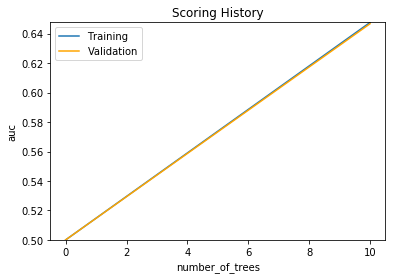

In [112]:
gbm.plot(metric='auc')

In [94]:
# Import H2O Grid Search:
from h2o.grid.grid_search import H2OGridSearch

# Import H2O GBM:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [96]:
# GBM hyperparameters
gbm_params = {'learn_rate': [0.1], 
                'max_depth': [3, 9, 15],
                'sample_rate': [0.8, 1.0],
                'col_sample_rate': [0.8, 1.0],
                'ntrees': [10, 20, 30]}

In [98]:
%%time
gbm_grid = H2OGridSearch(model=H2OGradientBoostingEstimator,
                          grid_id='gbm_grid1',
                          hyper_params=gbm_params1)
gbm_grid.train(x=h2o_df.columns[4:48], y='log_income', training_frame=train, 
                validation_frame=val, 
                seed=1)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%
Wall time: 24min 30s


In [101]:
gbm_gridperf = gbm_grid.get_grid(sort_by='mae', decreasing=True)

In [123]:
gbm_gridperf

     col_sample_rate learn_rate max_depth ntrees sample_rate  \
0                0.8        0.1         3     10         0.8   
1                1.0        0.1         3     10         1.0   
2                0.8        0.1         3     10         1.0   
3                1.0        0.1         3     10         0.8   
4                0.8        0.1         3     20         0.8   
5                1.0        0.1         3     20         1.0   
6                0.8        0.1         3     20         1.0   
7                1.0        0.1         3     20         0.8   
8                0.8        0.1         3     30         0.8   
9                1.0        0.1         3     30         1.0   
10               1.0        0.1         3     30         0.8   
11               0.8        0.1         3     30         1.0   
12               0.8        0.1         9     10         0.8   
13               0.8        0.1         9     10         1.0   
14               1.0        0.1         

In [118]:
gbm_grid

     col_sample_rate learn_rate max_depth ntrees sample_rate  \
0                1.0        0.1         9     30         1.0   
1                0.8        0.1         9     30         1.0   
2                1.0        0.1         9     30         0.8   
3                0.8        0.1         9     30         0.8   
4                1.0        0.1         9     20         1.0   
5                0.8        0.1         9     20         1.0   
6                1.0        0.1         9     20         0.8   
7                0.8        0.1         9     20         0.8   
8                0.8        0.1        15     20         1.0   
9                0.8        0.1        15     20         0.8   
10               0.8        0.1        15     30         1.0   
11               1.0        0.1        15     20         0.8   
12               0.8        0.1        15     10         0.8   
13               0.8        0.1        15     10         1.0   
14               1.0        0.1        1

In [126]:
gbm_gridperf.models[-1]

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm_grid1_model_32


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 1.953555994586969
RMSE: 1.3976966747427602
MAE: 1.1291609818426827
RMSLE: 0.13204466831228143
Mean Residual Deviance: 1.953555994586969

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 2.001864454749091
RMSE: 1.4148725931153983
MAE: 1.1427945400209023
RMSLE: 0.13348986067787694
Mean Residual Deviance: 2.001864454749091
Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2018-07-20 16:57:58,18 min 43.364 sec,0.0,1.4359328,1.1580946,2.0619029,1.4411328,1.1619421,2.0768638
,2018-07-20 16:57:59,18 min 44.265 sec,1.0,1.4308829,1.1543882,2.0474260,1.4366637,1.1587474,2.0640025
,2018-07-20 16:58:00,18 min 45.660 sec,2.0,1.4266595,1.1512987,2.0353575,1.4330171,1.1561627,2.0535380
,2018-07-20 16:58:02,18 min 46.894 sec,3.0,1.4231050,1.1486907,2.0252279,1.4300230,1.1540217,2.0449659
,2018-07-20 16:58:06,18 min 51.021 sec,5.0,1.4174869,1.1445345,2.0092692,1.4253679,1.1507106,2.0316736
,2018-07-20 16:58:10,18 min 55.062 sec,8.0,1.4116904,1.1402037,1.9928699,1.4210844,1.1476287,2.0194809
,2018-07-20 16:58:16,19 min 1.532 sec,11.0,1.4078363,1.1372670,1.9820031,1.4186580,1.1459359,2.0125906
,2018-07-20 16:58:21,19 min 6.262 sec,15.0,1.4043906,1.1345792,1.9723128,1.4168633,1.1445586,2.0075016
,2018-07-20 16:58:26,19 min 10.829 sec,20.0,1.4014614,1.1322453,1.9640941,1.4157617,1.1436558,2.0043812
,2018-07-20 16:58:31,19 min 15.858 sec,26.0,1.3990102,1.1302394,1.9572297,1.4151025,1.1430425,2.0025151


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
min_buy_price,81768.9062500,1.0,0.2428883
tac_user_count,31146.8925781,0.3809137,0.0925195
avg_buy_price,20881.4804688,0.2553719,0.0620269
max_buy_price,19410.6816406,0.2373846,0.0576580
min_price,18736.0097656,0.2291337,0.0556539
---,---,---,---
buy_price_to_discount_division,2573.2722168,0.0314701,0.0076437
max_buy_price_to_discount_division,2475.5424805,0.0302749,0.0073534
avg_to_current_price,2262.6765137,0.0276716,0.0067211
max_to_current_price,476.2033081,0.0058238,0.0014145



See the whole table with table.as_data_frame()


In [112]:
gbm_gridperf.models[0].model_performance(test)


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 1.9968192212941964
RMSE: 1.4130885397929587
MAE: 1.1429985967548135
RMSLE: 0.13351918208233965
Mean Residual Deviance: 1.9968192212941964


In [107]:
pr = gbm_gridperf1.models[0].predict(test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [113]:
pr = gbm.predict(test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [14]:
h2o.export_file(pr, 'hdfs://T2-HDFS-HA-PROD/user/andrey.lukyanenko/pred_new.csv')

Export File progress: |███████████████████████████████████████████████████| 100%


In [63]:
h2o.save_model(gbm_regressor, 'folder')

H2OServerError: HTTP 500 Server Error:
Server error water.api.FSIOException:
  Error: FS IO Failure: 
 accessed path : file:/dfs/11/yarn/nm/usercache/andrey.lukyanenko/appcache/application_1516896162029_95171/container_e86_1516896162029_95171_01_000007/folder%5CGBM_model_python_1531990891177_1 msg: File already exists
  Request: None


In [114]:
pr

predict,p1,p0
0,0.061673,0.938327
0,0.0560675,0.943933
0,0.0987542,0.901246
0,0.0874604,0.91254
0,0.049448,0.950552
0,0.0518455,0.948155
0,0.0597316,0.940268
0,0.0932738,0.906726
0,0.0615082,0.938492
0,0.049448,0.950552
